### Learning Rate (Multi-variable)

1. [learning rate](#section_1)
2. [feature scaling](#section_2)

#### <a name="section_1"></a> Learning Rate

#### Notations
![](img_fs_lr_notations.JPG)

#### Problem Statement

![](img_fs_lr_prob.JPG)

In [10]:
# imports
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [11]:
# loading data

def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

X_train, y_train = load_house_data()

In [12]:
# features
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

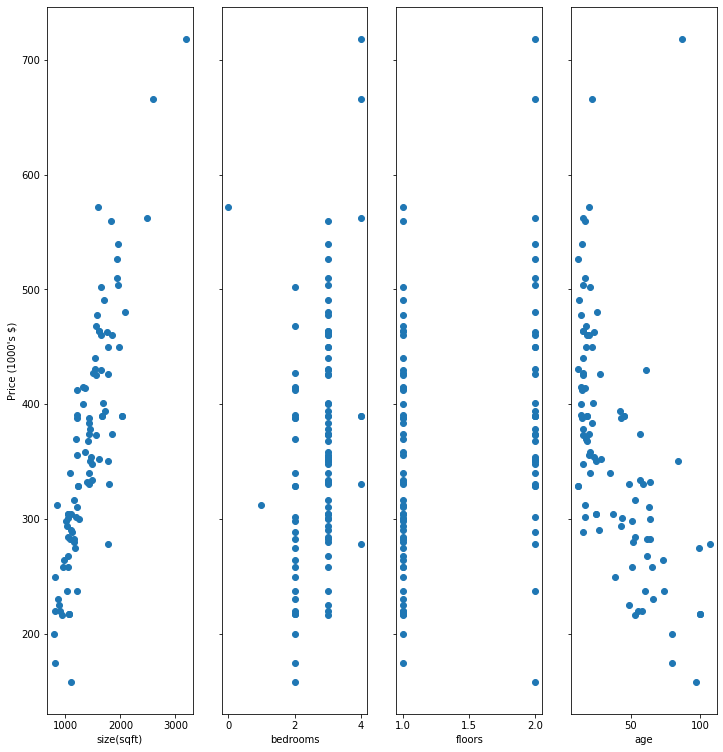

In [13]:
# plotting features

fig, ax = plt.subplots(1, 4, figsize=(12,13), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price (1000's $)")
plt.show()

#### Learning Rate (alpha)

![](img_fs_lr_lr.JPG)

In [82]:
# linear regression with multiple variables related functions

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient (X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
   
    # An array to store cost J at each iteration primarily for graphing later
    J_history = []
    w0_hist = []
    b_hist = []
    
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    
    for i in range (num_iters):
        
        # calculate gradients
        dj_db, dj_dw = gradient_function (X, y, w, b)
        
        # update params using w, b, alpha & gradients
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000:
            J_history.append (cost_function(X, y, w, b))
            w0_hist.append (w[0])
            b_hist.append (b) 
            
        if i% math.ceil(num_iters/10) == 0:
            cst = J_history[i]
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")     
        
    
        
    return w, b, J_history, w0_hist, b_hist

In [83]:
# plotting cost vs iterations, cost vs w

def plot_cost_iter_w(J_hist, w0_hist):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    ax[0].plot(np.arange(0,len(J_hist), 1), J_hist)
    ax[0].set_title("Cost vs Iteration")
    ax[0].set_ylabel("Cost")
    ax[0].set_xlabel("iteration")
    
    
    ax[1].scatter(w0_hist, J_hist)
    ax[1].plot(w0_hist, J_hist)
    ax[1].set_title("Cost vs w[0]")
    ax[1].set_ylabel("Cost")
    ax[1].set_xlabel("w[0]")
    

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

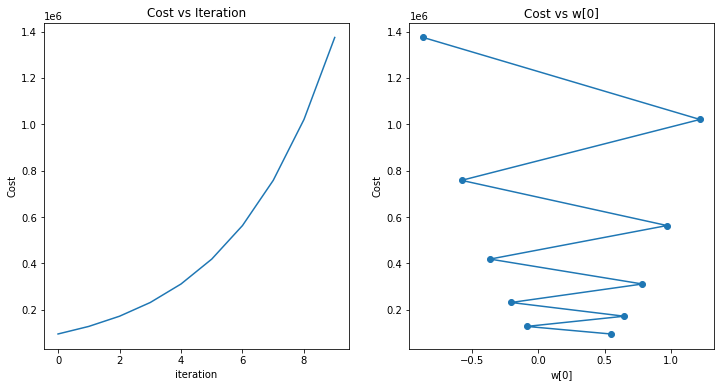

In [84]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 10

# setting alpha to 9.9e-7
alpha = 9.9e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

#### observations 
 
 - Cost vs Iteration: cost should increase after each iteration but it is increasing
 - Cost vs w[0]: w[0] updates are oscillating & cost keeps increasing, which in not desired (dj_dw0 keeps oscillating b/w -ve & +ve values)
 - Learning rate is too high, our soluting is not converging

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

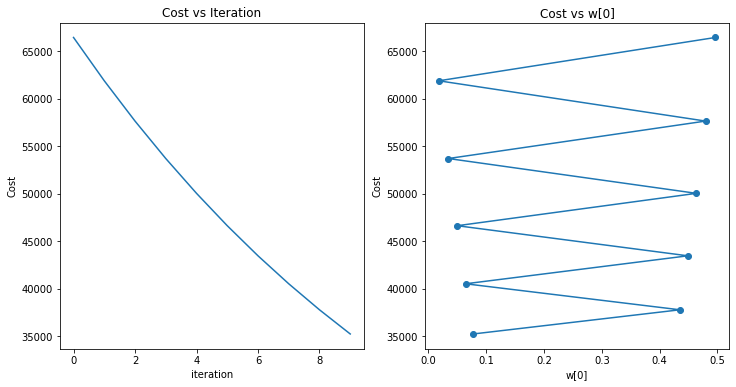

In [86]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 10

# setting alpha to 9e-7
alpha = 9e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

#### observations 
 
 - Cost vs Iteration: cost is decreasing, which is desired
 - Cost vs w[0]: cost is decreasing, however w[0] updates are oscillating which in not desired  (dj_dw0 keeps oscillating b/w -ve & +ve values)
 - learning rate is small enough to make the algorithm converge, but still large enough to cause oscillations in w0 update, algorithm will eventually converge but it is better if we can avoid the oscillations, lets further reduce alpha

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

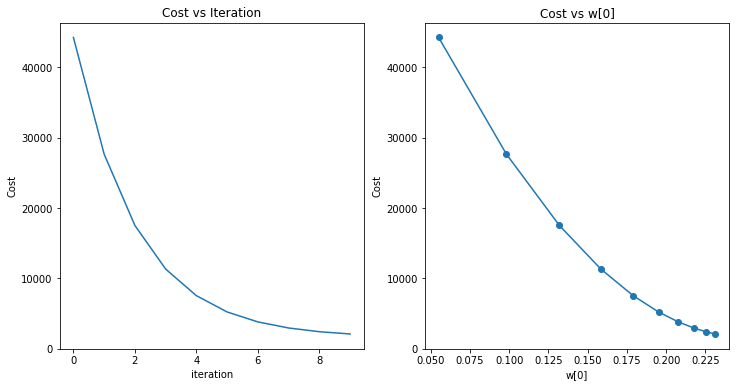

In [87]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 10

# setting alpha to 1e-7
alpha = 1e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

#### observations 
 
 - Cost vs Iteration: cost is decreasing, which is desired
 - Cost vs w[0]: cost is decreasing, without oscillations (dj_dw0 is always -ve), which is desired
 - we have found a suitable value learning rate alpha

#### <a name="section_2"></a> Feature Scaling